In [1]:
#Name: Sirinian Aram Emmanouil
#AM: 2537
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import scipy.sparse as sp_sparse
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.datasets as sk_data

In [2]:
df = pd.read_csv('data2.txt', sep="\t", header=None)
df.columns = ["user", "substance", "times"]

In [3]:
df

,user,substance,times
0,0,2,2
1,0,3,7
2,0,8,4
3,0,10,8
4,0,11,6
5,0,12,8
6,0,13,9
7,0,14,9
8,0,15,9
9,0,16,3


In [4]:
d = np.array(df).astype(np.float)
d.shape

(6966, 3)

In [5]:
M = sp_sparse.csr_matrix((d[:,2],(d[:,0],d[:,1])))
data = M.toarray()
#Subtract off the mean for each measurement type
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
# PCA with 2 components
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

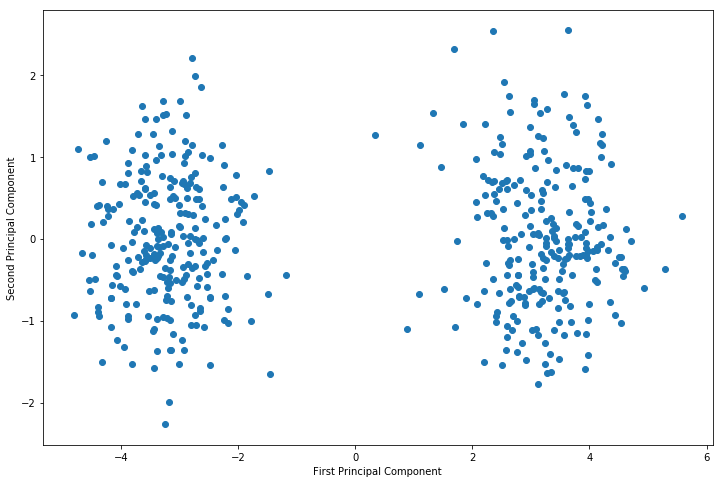

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [7]:
#Subtract off the mean for each measurement type
scaler2 = StandardScaler()
scaler2.fit(data)
scaled_data2 = scaler.transform(data)
# PCA with 1 components
pca2 = PCA(n_components=1)
pca2.fit(scaled_data2)
x_pca2 = pca2.transform(scaled_data2)

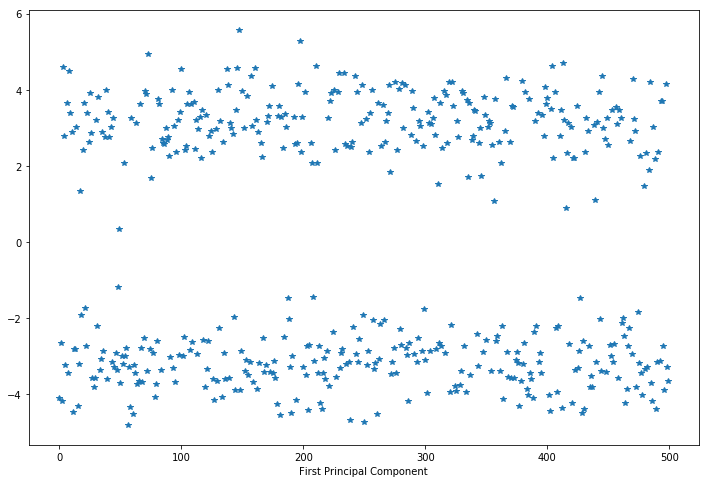

In [8]:
plt.figure(figsize=(12,8))
plt.plot(x_pca2, "*")
plt.xlabel('First Principal Component')

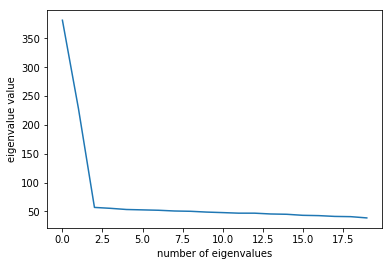

In [9]:
U, s, V = np.linalg.svd(data)
plt.plot(s[:])
plt.ylabel('eigenvalue value')
plt.xlabel('number of eigenvalues')

In [13]:
s2 = [pow(x, 2) for x in s]
print(abs(s2[0])/abs(np.sum(s2)))
print(abs(s2[1])/abs(np.sum(s2)))
print(abs(s2[0] + s2[1])/abs(np.sum(s2)))

0.608420987767
0.218208831508
0.826629819275
